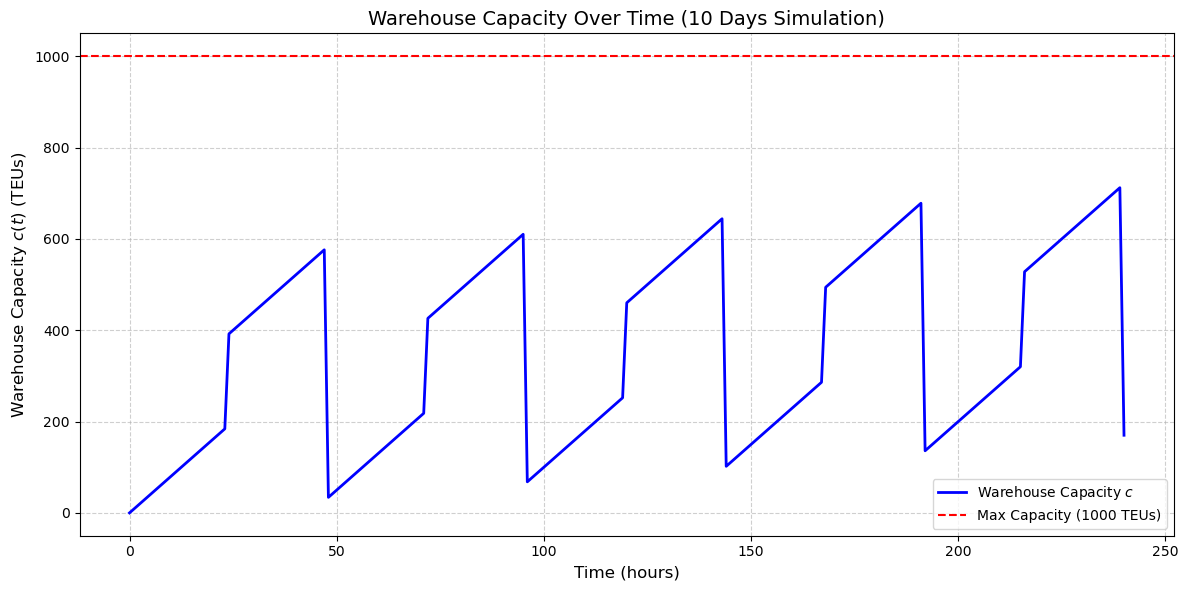

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Parameters

continuous_inflow_rate = 8           # TEUs per hour
discrete_ship_inflow = 200           # TEUs daily
discrete_train_outflow = 750         # TEUs every other day
warehouse_capacity = 1000            # Max warehouse capacity
time_horizon = 24 * 10               # 10 days = 240 hours

# Create time array
t = np.arange(0, time_horizon + 1)   # Hourly steps from 0 to 240

# Initialize warehouse capacity array
c = np.zeros_like(t, dtype=float)

# Simulation

for i in range(1, len(t)):
    # Continuous inflow
    c[i] = c[i - 1] + continuous_inflow_rate

    # Ship arrives every day (24h)
    if i % 24 == 0:
        c[i] += discrete_ship_inflow

    # Train departs every other day (48h)
    if i % 48 == 0:
        c[i] -= discrete_train_outflow

    # Enforce warehouse constraints (clamping)
    c[i] = min(max(c[i], 0), warehouse_capacity)

def find_periodicity(data, min_period=24, max_period=120):
    for period in range(min_period, max_period + 1):
        if len(data) < 2 * period:
            continue
        # Compare last `period` values with the `period` values before them
        if np.allclose(data[-period:], data[-2*period:-period]):
            # Search backwards for where the cycle begins
            for start in range(len(data) - 2 * period):
                if np.allclose(data[start:start+period], data[start+period:start+2*period]):
                    return start
    return None

# Detect periodic behavior
period_start = find_periodicity(c)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, c, color='blue', linewidth=2, label='Warehouse Capacity $c$')
plt.axhline(warehouse_capacity, color='red', linestyle='--', label='Max Capacity (1000 TEUs)')

if period_start is not None:
    plt.axvline(t[period_start], color='green', linestyle='--', linewidth=2,
                label=f'Periodic Behavior Starts (t = {t[period_start]}h)')

plt.title("Warehouse Capacity Over Time (10 Days Simulation)", fontsize=14)
plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("Warehouse Capacity $c(t)$ (TEUs)", fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("port_example_1.pdf")
plt.show()

